In [3]:
# add imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load dataset
df_raw = pd.read_csv('healthcare_business_dataset_messy.csv')
df_raw.info()
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  1025 non-null   int64  
 1   age                         945 non-null    float64
 2   gender                      1025 non-null   object 
 3   insurance_type              953 non-null    object 
 4   chronic_condition           591 non-null    object 
 5   visit_type                  1025 non-null   object 
 6   length_of_stay_days         943 non-null    float64
 7   treatment_cost_usd          943 non-null    float64
 8   claim_status                1025 non-null   object 
 9   readmitted_30_days          1025 non-null   object 
 10  patient_satisfaction_score  940 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 88.2+ KB


,patient_id,age,gender,insurance_type,chronic_condition,visit_type,length_of_stay_days,treatment_cost_usd,claim_status,readmitted_30_days,patient_satisfaction_score
0,1,69.0,Male,Public,Heart Disease,Inpatient,0.9,2300.25,Approved,No,4.0
1,2,32.0,Male,Public,Diabetes,Emergency,0.6,5696.66,Approved,Yes,4.7
2,3,89.0,Female,NaN,NaN,Emergency,1.9,1699.14,Denied,No,4.2
3,4,78.0,Male,Private,NaN,Emergency,0.0,4684.20,Denied,No,4.2
4,5,38.0,Male,Public,Diabetes,Outpatient,0.1,1865.43,Pending,No,2.8


### Initial Assessment, the data set contains, `1025` rows, `10` columns and abnormalities/incorrect data types.
### Next steps :
convert data to correct data types.

In [5]:
# grouping the numeric fields and converting to numeric type data
numeric_column = ['patient_id', 'age', 'length_of_stay_days','treatment_cost_usd', 'patient_satisfaction_score']

for col in numeric_column:
  df_raw[col] = df_raw[col].apply(pd.to_numeric, errors='coerce')
print("Converted columns to proper column type (Numeric)")

Converted columns to proper column type (Numeric)


In [6]:
# check for negative values
for col in numeric_column:
  print(col)
  print(df_raw[col].unique())

patient_id
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  195 

In [7]:
# remove outlier for numeric values (age)
df_raw = df_raw[(df_raw['age'] > 0) & (df_raw['age'] <= 120) ]
print("Removed outlier for age")
df_raw['age'].unique()

Removed outlier for age


array([69., 32., 89., 78., 38., 41., 20., 39., 70., 19., 47., 55., 77.,
       50., 75., 66., 76., 59., 64., 79., 68., 72., 81., 24., 56., 35.,
       21., 31., 26., 88., 61., 25., 52., 53., 67., 71., 80., 65., 57.,
       43., 58., 46., 62., 18., 28., 22., 45., 51., 40., 54., 82., 44.,
       60., 30., 49., 74., 23., 87., 29., 73., 36., 85., 34., 86., 33.,
       37., 84., 48., 42., 83., 63., 27.])

In [8]:
# remove outlier for numeric values (length_of_stay_days)
df_raw = df_raw[(df_raw['length_of_stay_days'] >= 0) & (df_raw['length_of_stay_days'] <= 60) ]
print("Removed outlier for length_of_stay_days")
df_raw['length_of_stay_days'].unique()

Removed outlier for length_of_stay_days


array([ 0.9,  0.6,  1.9,  0. ,  0.1,  2.4,  2.2, 15.7,  0.7,  0.4,  7.5,
        4.5,  7. ,  1.8,  1.2,  2.7,  8.3, 12.4,  4.8,  0.5,  0.2,  3.5,
        3.9,  7.9,  0.3,  4.4,  1.6,  3.2,  2.6, 13.4, 10.3,  9.9,  2. ,
        2.9,  4.6,  1.7,  3. ,  5.6,  9.8,  4. ,  5. ,  1. ,  1.4,  9.5,
        2.5, 15.4,  1.3,  8.4,  0.8,  4.1,  1.1,  7.3,  3.6,  7.2,  3.8,
        3.1,  2.8,  4.7,  6. ,  3.7,  3.3,  4.9,  6.5,  5.1,  3.4,  8.1,
        1.5, 10.1,  7.6,  5.2,  6.2,  5.8,  6.1, 12.9,  5.9,  9.6, 11.9,
        7.7, 16.2,  2.3,  6.8,  8. ,  4.2,  6.3,  9.2, 14.4,  9.1, 11.4,
        5.5, 15.2,  7.4,  5.4,  2.1,  9. , 10.5,  4.3,  5.7,  6.6,  5.3,
        6.9,  8.6, 15. ,  7.1,  8.7, 12.8, 11.3, 18. ,  8.2, 17.2, 10.9,
       13. ,  6.4])

In [9]:
# grouping the descriptive fields and removing extra spaces
descriptive_column = ['gender','insurance_type','chronic_condition','visit_type', 'claim_status', 'readmitted_30_days']
for col in descriptive_column:
  df_raw[col] = df_raw[col].str.lower().str.strip()
print("Converted columns to proper column type (Descriptive)")

Converted columns to proper column type (Descriptive)


In [10]:
#checking if there are any inconsistencies in the data , basically ensuring unique ness of values
for col in descriptive_column:
  print(col)
  print(df_raw[col].unique())

gender
['male' 'female' 'm' 'f']
insurance_type
['public' nan 'private' 'uninsured']
chronic_condition
['heart disease' 'diabetes' nan 'hypertension' 'multiple']
visit_type
['inpatient' 'emergency' 'outpatient']
claim_status
['approved' 'denied' 'pending']
readmitted_30_days
['no' 'yes' 'n' 'y']


### There are some inconsistencies in the data, so I am going to clean it and normalise the values

In [11]:
df_raw['gender'] = df_raw['gender'].replace({'f': 'female',
                                              'm': 'male'})
df_raw['readmitted_30_days'] = df_raw['readmitted_30_days'].replace({'n': 'no',
                                                                      'y': 'yes'})
df_raw

,patient_id,age,gender,insurance_type,chronic_condition,visit_type,length_of_stay_days,treatment_cost_usd,claim_status,readmitted_30_days,patient_satisfaction_score
0,1,69.0,male,public,heart disease,inpatient,0.9,2300.25,approved,no,4.0
1,2,32.0,male,public,diabetes,emergency,0.6,5696.66,approved,yes,4.7
2,3,89.0,female,NaN,NaN,emergency,1.9,1699.14,denied,no,4.2
3,4,78.0,male,private,NaN,emergency,0.0,4684.20,denied,no,4.2
4,5,38.0,male,public,diabetes,outpatient,0.1,1865.43,pending,no,2.8
...,...,...,...,...,...,...,...,...,...,...,...
1018,601,54.0,female,public,NaN,outpatient,2.1,4069.87,pending,no,3.0
1019,497,88.0,male,private,NaN,outpatient,10.3,4752.93,approved,no,2.5
1022,599,40.0,male,public,NaN,emergency,3.4,6991.10,approved,no,NaN
1023,503,36.0,female,private,NaN,outpatient,4.3,3244.64,denied,no,1.9


### Verify that, the values are now unique

In [12]:
for col in descriptive_column:
  print(col)
  print(df_raw[col].unique())

gender
['male' 'female']
insurance_type
['public' nan 'private' 'uninsured']
chronic_condition
['heart disease' 'diabetes' nan 'hypertension' 'multiple']
visit_type
['inpatient' 'emergency' 'outpatient']
claim_status
['approved' 'denied' 'pending']
readmitted_30_days
['no' 'yes']


### The data is now unique, and ready for the next steps, which is to check for nulls and fill missing values


In [13]:
patients_with_no_insurance = df_raw[df_raw['insurance_type'].isnull()]
patients_with_no_insurance

,patient_id,age,gender,insurance_type,chronic_condition,visit_type,length_of_stay_days,treatment_cost_usd,claim_status,readmitted_30_days,patient_satisfaction_score
2,3,89.0,female,NaN,NaN,emergency,1.9,1699.14,denied,no,4.2
11,12,55.0,male,NaN,NaN,emergency,7.5,NaN,approved,no,3.8
37,38,21.0,male,NaN,multiple,emergency,1.2,NaN,approved,no,3.0
100,101,52.0,male,NaN,hypertension,inpatient,2.7,2621.68,pending,no,3.9
107,108,44.0,female,NaN,heart disease,outpatient,0.8,200.00,approved,no,3.3
110,111,59.0,female,NaN,hypertension,outpatient,0.9,2493.27,approved,no,5.0
143,144,44.0,female,NaN,heart disease,outpatient,2.0,NaN,pending,no,4.8
150,151,76.0,male,NaN,diabetes,inpatient,1.1,NaN,approved,no,3.9
174,175,72.0,male,NaN,diabetes,outpatient,0.9,4849.46,approved,no,4.0
178,179,41.0,female,NaN,NaN,outpatient,3.3,4646.95,approved,no,2.8


In [14]:
# check for missing values
df_raw.isnull().sum() / len(df_raw)

,0
patient_id,0.000000
age,0.000000
gender,0.000000
insurance_type,0.066584
chronic_condition,0.431566
visit_type,0.000000
length_of_stay_days,0.000000
treatment_cost_usd,0.081381
claim_status,0.000000
readmitted_30_days,0.000000


## Insight :
### After reviewing the data , `treatment_cost` has  over `8%` of missing data,  `patient_satisfaction_score` over `7%`, `chronic_condition` has the most with over `40%` of the data missing and finally `insurance_type` with over `6%` of missing data

### Next steps :
- Fill missing `insurance_type` and `chronic_condition`, impute with `Unknown`
- Create a flag for `patient_satisfaction` as no review isn't random.and can be used to calculate what kind of people leave satisfaction reviews.
- Create a flag for `treatment_cost_usd`

In [15]:
# fill missing insurance type with unknown
#before filling missing values
print(f"No of missing values  : {df_raw['insurance_type'].isnull().sum()}")
df_raw['insurance_type'] = df_raw['insurance_type'].fillna('unknown')
print('Filling missing values ... ')
print(f"No of missing values  : {df_raw['insurance_type'].isnull().sum()}")


No of missing values  : 54
Filling missing values ... 
No of missing values  : 0


In [16]:
#  # fill missing chronic_condition with unknown
print(f"No of missing values before filling   : {df_raw['chronic_condition'].isnull().sum()}")
df_raw['chronic_condition'] = df_raw['chronic_condition'].fillna('unknown')
print('Filling missing values ... ')
print(f"No of missing values  after filling : {df_raw['chronic_condition'].isnull().sum()}")

No of missing values before filling   : 350
Filling missing values ... 
No of missing values  after filling : 0


In [17]:
#Create a flag for satisfaction score
df_raw['satisfaction_provided'] = df_raw['patient_satisfaction_score'].isna().map({
    True: 'no',
    False: 'yes'
})
df_raw

,patient_id,age,gender,insurance_type,chronic_condition,visit_type,length_of_stay_days,treatment_cost_usd,claim_status,readmitted_30_days,patient_satisfaction_score,satisfaction_provided
0,1,69.0,male,public,heart disease,inpatient,0.9,2300.25,approved,no,4.0,yes
1,2,32.0,male,public,diabetes,emergency,0.6,5696.66,approved,yes,4.7,yes
2,3,89.0,female,unknown,unknown,emergency,1.9,1699.14,denied,no,4.2,yes
3,4,78.0,male,private,unknown,emergency,0.0,4684.20,denied,no,4.2,yes
4,5,38.0,male,public,diabetes,outpatient,0.1,1865.43,pending,no,2.8,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,601,54.0,female,public,unknown,outpatient,2.1,4069.87,pending,no,3.0,yes
1019,497,88.0,male,private,unknown,outpatient,10.3,4752.93,approved,no,2.5,yes
1022,599,40.0,male,public,unknown,emergency,3.4,6991.10,approved,no,NaN,no
1023,503,36.0,female,private,unknown,outpatient,4.3,3244.64,denied,no,1.9,yes


In [18]:
#Create a flag for treament_cost_usd
df_raw['treatment_cost_provided'] = df_raw['treatment_cost_usd'].isna().map({
    True: 'no',
    False: 'yes'
})
df_raw

,patient_id,age,gender,insurance_type,chronic_condition,visit_type,length_of_stay_days,treatment_cost_usd,claim_status,readmitted_30_days,patient_satisfaction_score,satisfaction_provided,treatment_cost_provided
0,1,69.0,male,public,heart disease,inpatient,0.9,2300.25,approved,no,4.0,yes,yes
1,2,32.0,male,public,diabetes,emergency,0.6,5696.66,approved,yes,4.7,yes,yes
2,3,89.0,female,unknown,unknown,emergency,1.9,1699.14,denied,no,4.2,yes,yes
3,4,78.0,male,private,unknown,emergency,0.0,4684.20,denied,no,4.2,yes,yes
4,5,38.0,male,public,diabetes,outpatient,0.1,1865.43,pending,no,2.8,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,601,54.0,female,public,unknown,outpatient,2.1,4069.87,pending,no,3.0,yes,yes
1019,497,88.0,male,private,unknown,outpatient,10.3,4752.93,approved,no,2.5,yes,yes
1022,599,40.0,male,public,unknown,emergency,3.4,6991.10,approved,no,NaN,no,yes
1023,503,36.0,female,private,unknown,outpatient,4.3,3244.64,denied,no,1.9,yes,yes


In [19]:
#check for duplicates
df_raw.duplicated().sum()

np.int64(16)

### Dataset contains duplicate, drop duplicates

In [20]:
df_raw = df_raw.drop_duplicates()
df_raw.duplicated().sum()

np.int64(0)

### duplicates dropped, now make a copy of data for visualization


In [21]:
df_clean = df_raw.copy()
df_clean.head()

,patient_id,age,gender,insurance_type,chronic_condition,visit_type,length_of_stay_days,treatment_cost_usd,claim_status,readmitted_30_days,patient_satisfaction_score,satisfaction_provided,treatment_cost_provided
0,1,69.0,male,public,heart disease,inpatient,0.9,2300.25,approved,no,4.0,yes,yes
1,2,32.0,male,public,diabetes,emergency,0.6,5696.66,approved,yes,4.7,yes,yes
2,3,89.0,female,unknown,unknown,emergency,1.9,1699.14,denied,no,4.2,yes,yes
3,4,78.0,male,private,unknown,emergency,0.0,4684.20,denied,no,4.2,yes,yes
4,5,38.0,male,public,diabetes,outpatient,0.1,1865.43,pending,no,2.8,yes,yes


### Save the cleaned file for querying and visualization

In [52]:
df_clean.to_csv(
    'healthcare_dataset_clean.csv',
    index=False,
    encoding='utf-8'
)

## Exploratory metrics and KPI's

- Total revenue generated
- No of male and female genders
- most common insurance type
- Average age of patient
- Average length of stay day
- Average satisfaction score
- most common chronic disease.

## Other Metrics include
- Satisfaction count by gender
- Most common visit type by gender
- chronic condition by gender

In [22]:
# Key Metrics
total_revenue = df_clean[df_clean['claim_status'] == 'approved']['treatment_cost_usd'].sum()
gender_count = df_clean['gender'].value_counts()
most_common_insurance = df_clean['insurance_type'].value_counts().reset_index().nlargest(1, 'count')
average_age_patient = df_clean['age'].mean()
average_length_of_stay_day = df_clean['length_of_stay_days'].mean()
average_satisfaction_score = df_clean['patient_satisfaction_score'].mean()
types_chronic_condition = df_clean['chronic_condition'].value_counts().reset_index()

print(f"Total Revenue : {total_revenue:.2f}")
print(f"Gender Count : {gender_count}")
print(f"Most Common Insurance : {most_common_insurance}")
print(f"Average Age of Patient : {average_age_patient}")
print(f"Average Length of Stay Day : {average_length_of_stay_day}")
print(f"Average Satisfaction Score : {average_satisfaction_score}")
print(f"Most Common Chronic Condition : {types_chronic_condition}")

Total Revenue : 1796918.64
Gender Count : gender
female    406
male      389
Name: count, dtype: int64
Most Common Insurance :   insurance_type  count
0        private    422
Average Age of Patient : 52.91572327044025
Average Length of Stay Day : 2.8982389937106925
Average Satisfaction Score : 3.7717391304347827
Most Common Chronic Condition :   chronic_condition  count
0           unknown    341
1          diabetes    180
2      hypertension    151
3     heart disease     90
4          multiple     33


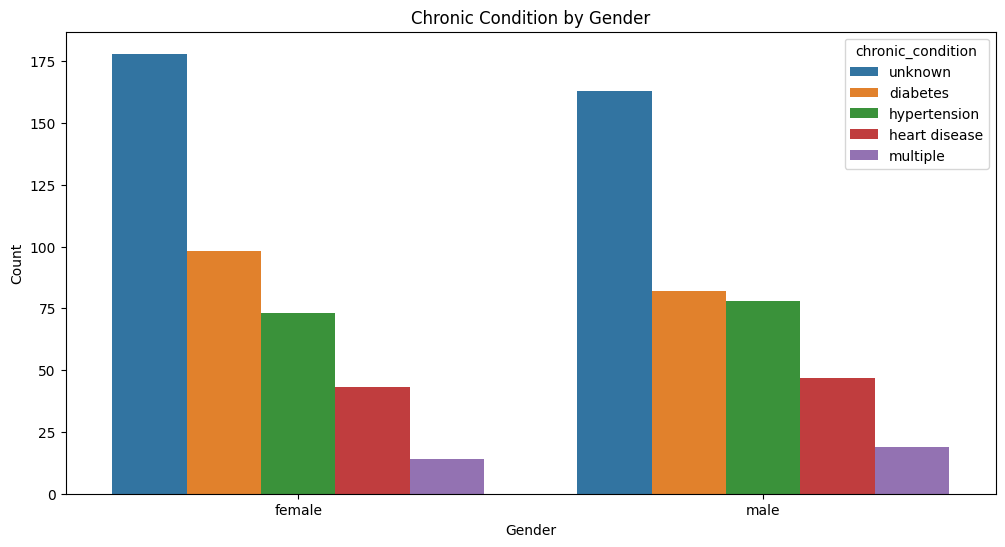

In [23]:

# chronic_condition_by_gender = df_clean.groupby(['gender', 'chronic_condition']).size().reset_index(name='count')
# chronic_condition_by_gender
plt.figure(figsize=(12, 6))
chronic_condition_by_gender_2 = df_clean.groupby('gender')['chronic_condition'].value_counts().reset_index(name='count')
sns.barplot(data=chronic_condition_by_gender_2, x='gender', y='count', hue='chronic_condition')
plt.title('Chronic Condition by Gender')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
#

### The count of disease for Male and female were similar for `unknown sources`, `hypertension`, `heart disease` and `multiple`, with the exception of `diabetes` the count for the female far exceeds that of the male.

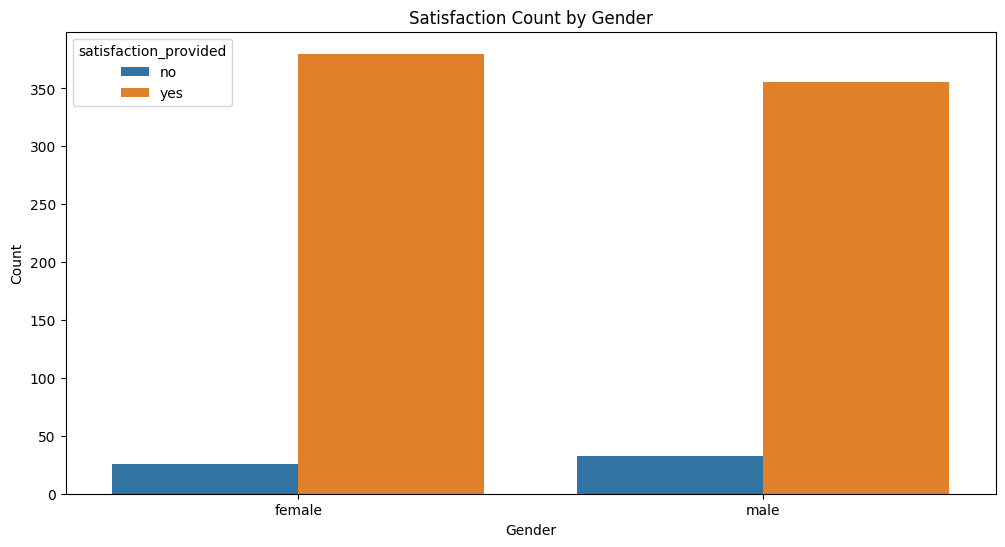

In [24]:
satisfaction_count_by_gender = df_clean.groupby(['gender', 'satisfaction_provided']).size().reset_index(name='count')
satisfaction_count_by_gender
plt.figure(figsize=(12, 6))
sns.barplot(data=satisfaction_count_by_gender, x='gender', y='count', hue='satisfaction_provided')
plt.title('Satisfaction Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### More female clients provided satisfaction reviews than male clients. while the amonut of clients that didnt leave a review was almost similar between male and female with the male having a slight edge

In [50]:
most_common_visit_type = df_clean['visit_type'].value_counts().reset_index(name='count')
most_common_visit_type

,visit_type,count
0,outpatient,467
1,emergency,208
2,inpatient,120


### The most popular type of visit were the `outpatient`, having a count of `459`, followed by the `emergency client` with `202` visit and the least popular where the `inpatient` with a count of `118`

In [26]:
chronic_condition_by_age = df_clean.groupby('chronic_condition')['age'].agg(
                          min_age = 'min',
                          average_age = 'median',
                          max_age ='max').reset_index()
chronic_condition_by_age

,chronic_condition,min_age,average_age,max_age
0,diabetes,18.0,55.0,88.0
1,heart disease,18.0,50.0,89.0
2,hypertension,18.0,53.0,89.0
3,multiple,18.0,60.0,84.0
4,unknown,18.0,51.0,89.0


### The minimun age for all of the provided chronical case is `18` year anfd the average rate of chronic conditions ranges from `50` to `62` years of age , with heart disease being the least and multiple being the most, the max age for multipe disease is `84`, while the other disease have similar max age which is `89` with the exception of diabetes whose max age is `88`


In [35]:
# Denial rate
denial_rate = df_clean[df_clean['claim_status'] == 'denied']['patient_id'].count() / len(df_clean) * 100
print(f"Denial Rate : {denial_rate:.2f}%")

Denial Rate : 16.73%


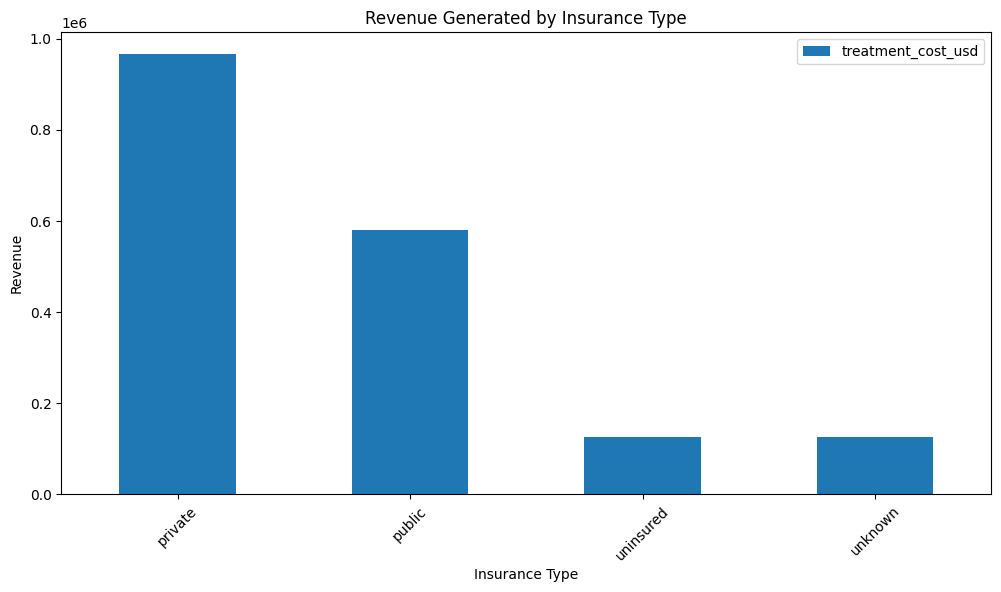

In [54]:
#amount of revenue generated by insurance type
# revenue_by_insurance = df_clean.groupby('insurance_type')['treatment_cost_usd'].sum()
revenue_by_insurance = df_clean[df_clean['claim_status'] == 'approved'].groupby('insurance_type')['treatment_cost_usd'].sum().reset_index()
revenue_by_insurance.plot(kind='bar', x='insurance_type', y='treatment_cost_usd' ,figsize=(12, 6))
plt.title('Revenue Generated by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Operational Efficiency
visit_type_distribution = df_clean['visit_type'].value_counts(normalize=True) * 100
visit_type_distribution

,proportion
visit_type,
outpatient,58.742138
emergency,26.163522
inpatient,15.094340


In [47]:
# Average cost by visit type
average_cost_by_visit_type = df_clean.groupby('visit_type')['treatment_cost_usd'].mean().reset_index().sort_values(by='treatment_cost_usd', ascending=False)
average_cost_by_visit_type

,visit_type,treatment_cost_usd
1,inpatient,3722.310826
0,emergency,3627.834337
2,outpatient,3428.746901


# Conclusion and Recommendations
-  The total revenue generated from approved claims was `$1,796,918.64`
-  More `female` patients visited the hospital than `male` patients did.
-  `Private insurance` was the most popular kind of insurance
- The count of disease for `Male` and `Female` was similar for `unknown sources`, `hypertension`, `heart disease` and `multiple`, with the exception of `diabetes` the count for the female far exceeds that of the male patients.
- `Female` patients gave more feedback on `satisfaction`, than the `male` patients, Further investigation into engagement strategies for male patients may be warranted.
-  The most popular type of visit were the `outpatient`, having a count of `459`, followed by the `emergency patients` with `202` visit and the least popular wases the `inpatient` with a count of `118`
- Patients denial rate is `16.73%`, which is higher than industry standard (`5%`)
- The most popular kind of visit type were `outpatients`, but `inpatients` generated the most revenue on average.
-  The `minimun` age for all of the provided chronical case is `18 years` and the average rate of chronic conditions ranges from `50` to `62 years` of age , with `heart disease` being the least and `multiple` being the most, the max age for `multipe disease` is `84`, while the other disease have similar max age which is `89` with the exception of `diabetes` whose max age is `88`